In [1]:
import torch
import torchvision
import os, sys, matplotlib.pyplot as plt, numpy as np
%matplotlib inline
sys.path.append('../src/')
from vae import VAE_small


In [2]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 64
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 42
torch.manual_seed(random_seed)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('../data/', train=True, download=False,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor()
                             ])),
  batch_size=batch_size_train, shuffle=True, pin_memory=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('../data/', train=False, download=False,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor()
                             ])),
  batch_size=batch_size_test, shuffle=True, pin_memory=True)

In [4]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

0 tensor(3)
784


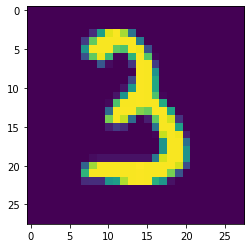

In [5]:
print(batch_idx, example_targets[0])
print(example_data.numpy()[0][0].size)
plt.imshow(example_data.numpy()[0][0])

In [6]:
np.min(example_data.numpy()[0][0]), np.max(example_data.numpy()[0][0])

(0.0, 1.0)

In [7]:
layers = [256, 64, 16]
epochs = [30, 31]
# regularization = ('weight_decay', 0.05)
loss_threshold = 0.01

In [8]:
model = VAE_small([28,28], device, layers)

In [9]:
train_err, test_err = model.train(train_loader, epochs=epochs, test_data=test_loader, loss_threshold=loss_threshold)

  0%|          | 0/31 [00:00<?, ?it/s]

starting training...


32it [05:43, 12.59s/it]                        


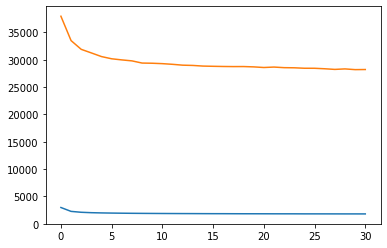

In [18]:
plt.plot(train_err)
plt.plot(test_err)

In [11]:
for data,_ in test_loader:
    print(data.size())

torch.Size([1000, 1, 28, 28])
torch.Size([1000, 1, 28, 28])
torch.Size([1000, 1, 28, 28])
torch.Size([1000, 1, 28, 28])
torch.Size([1000, 1, 28, 28])
torch.Size([1000, 1, 28, 28])
torch.Size([1000, 1, 28, 28])
torch.Size([1000, 1, 28, 28])
torch.Size([1000, 1, 28, 28])
torch.Size([1000, 1, 28, 28])


In [12]:
ex = model.encode(test_loader)
ex = ex[:10,:, :1,:]
ex.shape

(10, 2, 1, 16)

In [13]:
dx = model.decode(torch.tensor(ex))

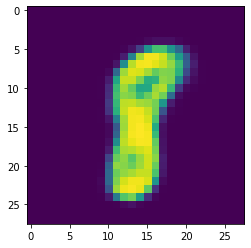

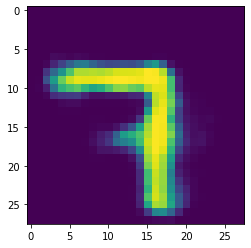

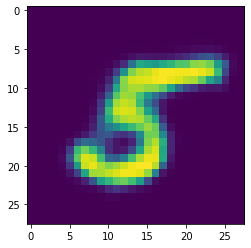

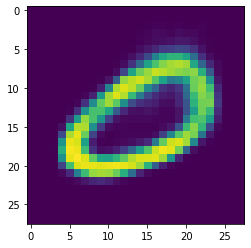

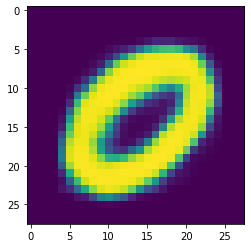

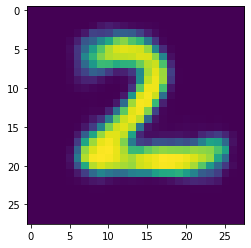

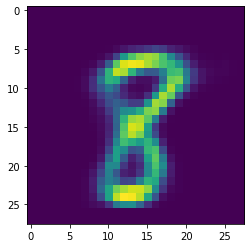

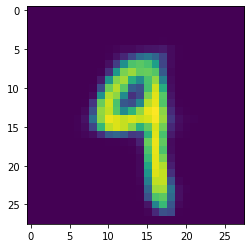

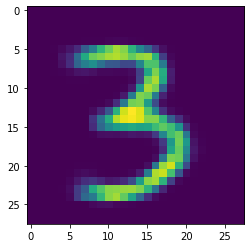

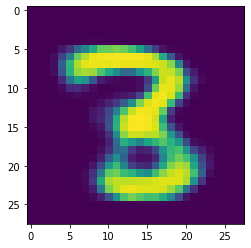

In [14]:
for n in range(10):
    plt.imshow(dx[n, 0].reshape([28,28]))
    plt.show()

In [19]:
dr = model.decode(torch.randn([25, 2, 1, 16]))

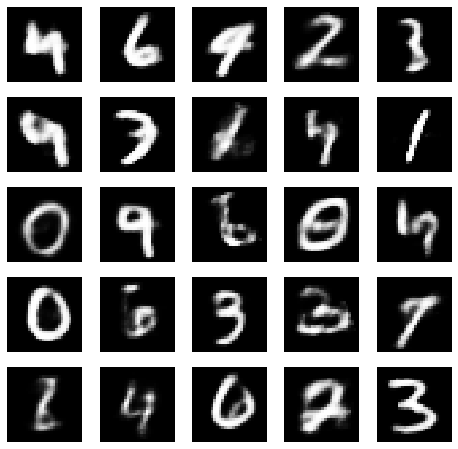

In [31]:
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 5
rows = 5
for i in range(1, columns*rows +1):
    img = dr[i-1, 0].reshape([28,28])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
# plt.savefig("test.png", bbox_inches='tight')
plt.show()

In [24]:
from torchvision.utils import save_image

save_image(torch.tensor(dr)[:25, 0], "vae.png", nrow=5, normalize=True)